<a href="https://colab.research.google.com/github/uervitonsantos/TrabalhoDeAnaliseDeDados/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importando a biblioteca pandas, matplotlib e os DataFrames





In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





In [15]:
eventos = pd.read_csv('/content/athlete_events.csv', sep=',')
regiao = pd.read_csv('/content/noc_regions.csv', sep=',') 

## Visualizando as 5 primeiras linhas dos DataFrames

In [16]:
display(eventos.head(5))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [17]:
display(regiao.head(5))

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## Verificando informações dos DataFrames

In [18]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [19]:
regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


## Tipo dos dados do DataFrame


In [20]:
eventos.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [21]:
regiao.dtypes

NOC       object
region    object
notes     object
dtype: object

## Verificando a quantidade de linha e colunas

In [22]:
eventos.shape

(271116, 15)

In [23]:
regiao.shape

(230, 3)

##  Eliminando as colunas dos DataFrames que não serão utilizadas

In [24]:
eventos = eventos.drop(['Age', 'Height', 'Weight'], axis=1)


In [25]:
regiao = regiao[['NOC','region']]

## Visualizando o resultado

In [26]:
display(eventos.head(10))

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


## Realizando merge dos DataFrames

In [27]:
eventos_1 = eventos.merge(regiao, on='NOC')

## Visualizando o resultado

In [28]:
display(eventos_1.head(5))

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


## Renomeando as colunas

In [29]:
eventos_1 = eventos.rename(columns={'Name':'Atleta', 'Sex': 'Sexo', 'Team': 'Equipe', 'Games': 'Jogos', 'Year': 'Ano', 'Season': 'Temporada', 'City': 'Cidade', 'Sport': 'Esporte', 'Event': 'Evento', 'Medal': 'Medalha', 'region': 'Região'})

In [30]:
display(eventos_1.head(5))

,ID,Atleta,Sexo,Equipe,NOC,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Remover as linhas onde medalha for igual a 'NaN'

In [31]:
eventos_2 = eventos_1.dropna()

In [32]:
display(eventos_2.head(5))

,ID,Atleta,Sexo,Equipe,NOC,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


## Ordenando pelo ano no formato Ascending = True

In [33]:
eventos_2 = eventos_2.sort_values(['Ano'])

display(eventos_2.head(10))

,ID,Atleta,Sexo,Equipe,NOC,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha
23916,12563,Conrad Helmut Fritz Bcker,M,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold
244276,122329,Georgios Tsitas,M,Greece,GRE,1896 Summer,1896,Summer,Athina,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",Silver
214352,107613,Carl Schuhmann,M,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold
214351,107613,Carl Schuhmann,M,Germany,GER,1896 Summer,1896,Summer,Athina,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",Gold
214348,107613,Carl Schuhmann,M,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
194678,97712,"Leonidas ""Leon"" Pyrgos",M,Greece,GRE,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Gold
204732,102806,Richard Rstel,M,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
204734,102806,Richard Rstel,M,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold
214346,107613,Carl Schuhmann,M,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Gold
42249,21795,Ellery Harding Clark,M,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's High Jump,Gold


## Total de medalhistas por sexo

In [34]:
medalhista_sexo = eventos_2['Sexo'].value_counts()

In [35]:
display(medalhista_sexo)

M    28530
F    11253
Name: Sexo, dtype: int64

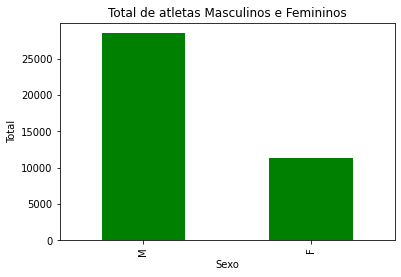

In [36]:
medalhistas = medalhista_sexo.plot.bar(title='Total de atletas Masculinos e Femininos',
                                        xlabel='Sexo',
                                        ylabel='Total',
                                        color='green')



In [37]:
## Total de medalhas de ouros por sexo

In [38]:
medalhas_de_ouro = eventos_2[eventos_2['Medalha'] == 'Gold']

In [39]:
medalhas_ouro_sexo = medalhas_de_ouro['Sexo'].value_counts()

display(medalhas_ouro_sexo)

M    9625
F    3747
Name: Sexo, dtype: int64

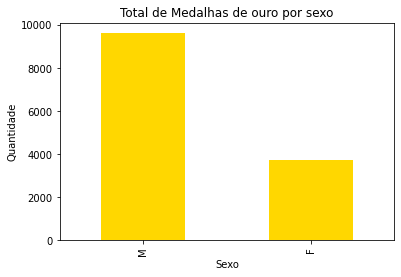

In [40]:
medalhas_ouro_sexo = medalhas_ouro_sexo.plot.bar(title='Total de Medalhas de ouro por sexo',
                                                xlabel='Sexo',
                                                ylabel='Quantidade',
                                                color='gold')

## Total de medalhas de prata por sexo

In [41]:
medalhas_de_prata = eventos_2[eventos_2['Medalha'] == 'Silver']


In [42]:
medalhas_prata_sexo = medalhas_de_prata['Sexo'].value_counts()

display(medalhas_prata_sexo)

M    9381
F    3735
Name: Sexo, dtype: int64

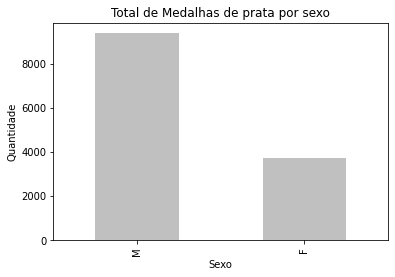

In [43]:
medalhas_prata_sexo = medalhas_prata_sexo.plot.bar(title='Total de Medalhas de prata por sexo',
                                                xlabel='Sexo',
                                                ylabel='Quantidade',
                                                color='silver')

## Total de medalhas de bronze por sexo

In [44]:
medalhas_de_bronze = eventos_2[eventos_2['Medalha'] == 'Bronze']

In [45]:
medalhas_bronze_sexo = medalhas_de_bronze['Sexo'].value_counts()

display(medalhas_bronze_sexo)

M    9524
F    3771
Name: Sexo, dtype: int64

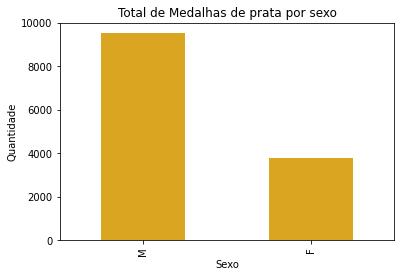

In [46]:
medalhas_bronze_sexo = medalhas_bronze_sexo.plot.bar(title='Total de Medalhas de prata por sexo',
                                                xlabel='Sexo',
                                                ylabel='Quantidade',
                                                color='goldenrod')

## Total de medalhas conquistadas pelo Brasil

In [47]:
medalhas_Brasil = eventos_2[eventos_2['NOC'] == 'BRA' ]

In [48]:
display(medalhas_Brasil.head(5))

,ID,Atleta,Sexo,Equipe,NOC,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha
224730,112886,Fernando Soledade,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
47792,24637,Afrnio Antnio da Costa,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver
47793,24637,Afrnio Antnio da Costa,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
181713,91332,Guilherme Paraense,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Pistol, 30 metres",Gold
181712,91332,Guilherme Paraense,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze


## Total de medalhas de ouro por sexo (Brasil)

In [49]:
medalhas_O_S_B = medalhas_Brasil[medalhas_Brasil['Medalha'] == 'Gold']

In [50]:
display(medalhas_O_S_B.head(5))

,ID,Atleta,Sexo,Equipe,NOC,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha
181713,91332,Guilherme Paraense,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Pistol, 30 metres",Gold
47881,24678,Adhemar Ferreira da Silva,M,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's Triple Jump,Gold
47882,24678,Adhemar Ferreira da Silva,M,Brazil,BRA,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's Triple Jump,Gold
224203,112616,Marcos Pinto Rizzo Soares,M,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed Two Person Dinghy,Gold
185075,93022,Eduardo Henrique Gomes Penido,M,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed Two Person Dinghy,Gold


In [51]:
medalhas_O_S_B = medalhas_O_S_B['Sexo'].value_counts()

display(medalhas_O_S_B.head(5))

M    78
F    31
Name: Sexo, dtype: int64

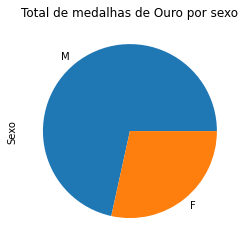

In [52]:
medalhas_O_S_B = medalhas_O_S_B.plot.pie(title='Total de medalhas de Ouro por sexo')

## Total de medalhas de prata por sexo (Brasil)

In [53]:
medalhas_P_S_B = medalhas_Brasil[medalhas_Brasil['Medalha'] == 'Silver']

In [54]:
display(medalhas_P_S_B.head())

,ID,Atleta,Sexo,Equipe,NOC,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha
47792,24637,Afrnio Antnio da Costa,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver
193788,97270,Nlson Prudncio,M,Brazil,BRA,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's Triple Jump,Silver
1651,918,Ademir Roque Kaefer,M,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1733,966,Daniel Adler,M,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
261703,130944,Lus Carlos Coelho Winck,M,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver


In [55]:
medalhas_P_S_B = medalhas_P_S_B['Sexo'].value_counts()

display(medalhas_P_S_B.head(5))

M    120
F     55
Name: Sexo, dtype: int64

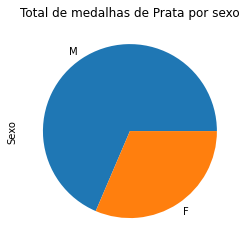

In [56]:
medalhas_P_S_B = medalhas_P_S_B.plot.pie(title='Total de medalhas de Prata por sexo')

## Total de medalhas de bronze por sexo (Brasil)

In [57]:
medalhas_B_S_B = medalhas_Brasil[medalhas_Brasil['Medalha'] == 'Bronze']

In [58]:
display(medalhas_B_S_B.head(5))

,ID,Atleta,Sexo,Equipe,NOC,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha
224730,112886,Fernando Soledade,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
47793,24637,Afrnio Antnio da Costa,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
181712,91332,Guilherme Paraense,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
262475,131327,Sebastio Wolf,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
14409,7767,Dario Barbosa,M,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze


In [59]:
medalhas_B_S_B = medalhas_B_S_B['Sexo'].value_counts()

display(medalhas_B_S_B.head(5))

M    142
F     49
Name: Sexo, dtype: int64

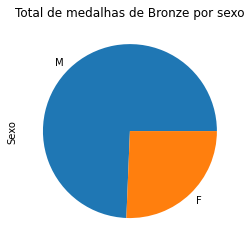

In [60]:
medalhas_B_S_B = medalhas_B_S_B.plot.pie(title='Total de medalhas de Bronze por sexo')